# Python fundamentals part 2

- error handling 
  - try-except
  - different types of errors
- file handling
- functions
- matplotlib 
- numpy

## Error handling
- syntax error
- runtime errors (exceptions) 
- logical errors

### syntax error

In [1]:
prin("linear regression is a supervised learning algorithm")

NameError: name 'prin' is not defined

In [2]:
print("linear regression is a supervised learning algorithm")

linear regression is a supervised learning algorithm


### runtime error

In [5]:
# [0,1,2,3,4]
numbers = list(range(5))

numbers[5]

IndexError: list index out of range

### logical error
- can be hard to detect

In [8]:
import numpy as np 

radius = 5

# circle area is actually pi*r^2
circle_area = np.pi*radius
print(f"{circle_area = :.2f} area units")

circle_area = 15.71 area units


### try-except

In [10]:
age = float(input("Enter your age: "))

print(age)

-32.0


In [12]:
age = float(input("Enter your age: "))
if not 0 <= age <= 125:
    raise ValueError(f"You entered {age}, age must be between 0 and 125")

ValueError: You entered -412.0, age must be between 0 and 125

In [13]:
age = float(input("Enter your age: "))
if not 0 <= age <= 125:
    raise ValueError(f"You entered {age}, age must be between 0 and 125")

ValueError: You entered 145.0, age must be between 0 and 125

In [17]:
while True:
    try:
        age = float(input("Enter your age: "))
        if not 0 <= age <= 125:
            raise ValueError(f"You entered {age}, age must be between 0 and 125")
        print(f"You are {age} years old")
        break
    except ValueError as err:
        print(err)



You entered -321.0, age must be between 0 and 125
You entered 127.0, age must be between 0 and 125
You are 0.0 years old


## Functions

- reuse code
- organize code
- increase readability
- modular code
- DRY

In [19]:
# number is input parameter
def cuber(number):
    return number**3

# call the function cuber with input argument 2
cuber(2)


8

In [20]:
cubes = [cuber(number) for number in range(5)]
cubes

[0, 1, 8, 27, 64]

### Default value

In [21]:
for i in range(1, 5):
    print(i*"x ")

x 
x x 
x x x 
x x x x 


In [25]:
# void function - returns None, but has a side effect by printing
def draw_ascii_triangle(number_rows=5):
    for i in range(1, number_rows+1):
        print(i*"x ")

draw_ascii_triangle()



x 
x x 
x x x 
x x x x 
x x x x x 


In [26]:
# 10 overwrites the default value of 5
draw_ascii_triangle(10)

x 
x x 
x x x 
x x x x 
x x x x x 
x x x x x x 
x x x x x x x 
x x x x x x x x 
x x x x x x x x x 
x x x x x x x x x x 


### Arbitrary arguments, *args

- arbitrary number of positional arguments

In [28]:
def average(*numbers):
    sum_ = 0
    for number in numbers:
        sum_ += number

    return sum_/len(numbers)

# (1+2+3)/3
average(1,2,3)

2.0

In [29]:
average(1,2,34,5,12,51,23,34)

20.25

### Keyword arguments, **kwargs

In [35]:
def simulate_dices(throws=1, dices=2):
    return np.random.randint(1,7, size=(throws, dices))

simulate_dices()

array([[1, 1]])

In [37]:
simulate_dices(5,2)

array([[6, 6],
       [2, 6],
       [3, 3],
       [2, 1],
       [1, 3]])

In [39]:
simulate_dices(throws=6, dices=4).shape

(6, 4)

In [40]:
simulate_dices(dices=3)

array([[4, 4, 3]])

### Lambda functions
- anonymous functions
- can be used inside other functions
- examples will be shown later in the course

In [41]:
cuber = lambda x: x**3

cuber(5)

125

## Matplotlib

x = (-5, -4, -3, -2, -1, 0, 1, 2, 3, 4)
y = [-17, -14, -11, -8, -5, -2, 1, 4, 7, 10]
y2 = [23, 14, 7, 2, -1, -2, -1, 2, 7, 14]


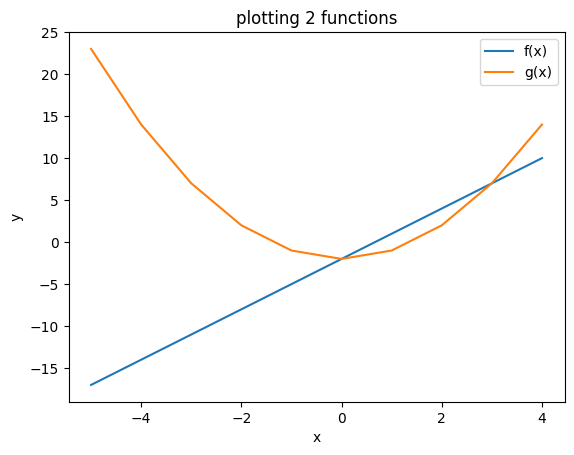

In [54]:
import matplotlib.pyplot as plt

f = lambda x: 3 * x - 2

def g(x):
    return x**2 - 2

# similar to list but immutable, i.e. can't change values in a tuple
x = tuple(range(-5,5))
print(f"{x = }")

y = [f(i) for i in x]
y2 = [g(i) for i in x]

print(f"{y = }")
print(f"{y2 = }")

plt.plot(x, y)
plt.plot(x, y2)
plt.title("plotting 2 functions")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["f(x)", "g(x)"])

### plot with numpy

In [55]:
import numpy as np

x = np.linspace(-5,5)
x


array([-5.        , -4.79591837, -4.59183673, -4.3877551 , -4.18367347,
       -3.97959184, -3.7755102 , -3.57142857, -3.36734694, -3.16326531,
       -2.95918367, -2.75510204, -2.55102041, -2.34693878, -2.14285714,
       -1.93877551, -1.73469388, -1.53061224, -1.32653061, -1.12244898,
       -0.91836735, -0.71428571, -0.51020408, -0.30612245, -0.10204082,
        0.10204082,  0.30612245,  0.51020408,  0.71428571,  0.91836735,
        1.12244898,  1.32653061,  1.53061224,  1.73469388,  1.93877551,
        2.14285714,  2.34693878,  2.55102041,  2.75510204,  2.95918367,
        3.16326531,  3.36734694,  3.57142857,  3.7755102 ,  3.97959184,
        4.18367347,  4.3877551 ,  4.59183673,  4.79591837,  5.        ])

In [56]:
x.shape

(50,)

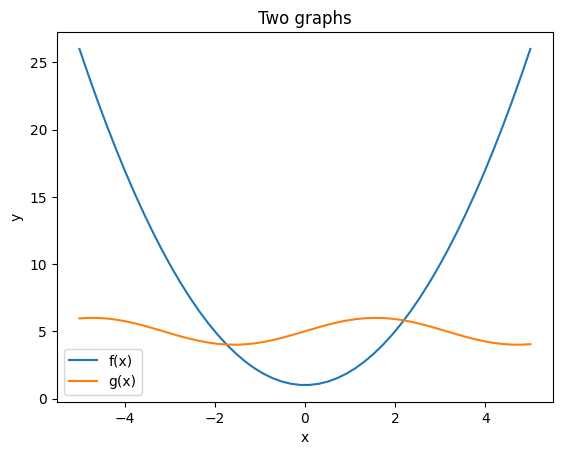

In [65]:
f = lambda x: x**2 + 1
g = lambda x: np.sin(x) + 5

# OOP approach
fig, ax = plt.subplots(1)

ax.plot(x, f(x), label="f(x)")
ax.plot(x, g(x), label="g(x)")
ax.set(title="Two graphs", xlabel="x", ylabel="y")
ax.legend()

## more on numpy

In [68]:
vector1 = np.array([2,5,1])
print(f"{vector1 = }")

# elementwise multiplication
vector1*2


vector1 = array([2, 5, 1])


array([ 4, 10,  2])

In [69]:
# elementwise addition
vector1 + 3

array([5, 8, 4])

In [70]:
[2,5,1] + 3

TypeError: can only concatenate list (not "int") to list

In [71]:
# the list copies three times and concatenates
[2,5,1]*3

[2, 5, 1, 2, 5, 1, 2, 5, 1]

In [72]:
vector1.sum()

8

In [73]:
vector1.shape

(3,)

In [74]:
vector1[-1]

1

### Performance

In [75]:
%%timeit 
import random as rnd 

number_dices = 1000000
[rnd.randint(1,6) for _ in range(number_dices)]

715 ms ± 3.87 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [76]:
%%timeit 
number_dices = 1000000
np.random.randint(1,7, number_dices)

11.8 ms ± 295 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [77]:
715/11.8

60.593220338983045